In [1]:
# Импорт необходимых библиотек
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import warnings
warnings.filterwarnings('ignore')

print("Библиотеки для обработки данных и машинного обучения успешно импортированы")

Matplotlib is building the font cache; this may take a moment.


Библиотеки для обработки данных и машинного обучения успешно импортированы


In [2]:
# Загрузка данных
print("ЗАГРУЗКА ДАННЫХ")

# Загружаем данные с правильным сепаратором (табуляция)
df = pd.read_csv('DB_3.csv', sep='\t')
print("Данные успешно загружены из файла DB_3.csv")
print(f"Размерность данных: {df.shape[0]} строк, {df.shape[1]} столбцов")

# Первичный просмотр структуры данных
print("\nПервые 3 строки данных:")
display(df.head(3))

ЗАГРУЗКА ДАННЫХ
Данные успешно загружены из файла DB_3.csv
Размерность данных: 400 строк, 16 столбцов

Первые 3 строки данных:


,user_id\t,age,gender,occupation,work_mode,screen_time_hours\t,work_screen_hours,leisure_screen_hours,sleep_hours,sleep_quality_1_5,stress_level_0_10,productivity_0_100\t,exercise_minutes_per_week,social_hours_per_week,mental_wellness_index_0_100,Unnamed: 15
0,U0001,33,Female,Employed,Remote,10.79,5.44,5.35,6.63,1.0,9.3,44.7,127,0.7,9.3,NaN
1,U0002,28,Female,Employed,In-person,7.40,0.37,7.03,8.05,3.0,5.7,78.0,74,2.1,56.2,NaN
2,U0003,35,Female,Employed,Hybrid,9.78,1.09,8.69,6.48,1.0,9.1,51.8,67,8.0,3.6,NaN


In [3]:
# Приобретение понимания данных
print("ПРИОБРЕТЕНИЕ ПОНИМАНИЯ ДАННЫХ")

print("1. ЧТО ПРЕДСТАВЛЯЮТ СОБОЙ ДАННЫЕ?")
print("Данные содержат информацию о пользователях и их цифровых привычках:")
print("- Демографические данные (возраст, гендер, занятость)")
print("- Режим работы и занятость")
print("- Время использования устройств (общее, работа, досуг)")
print("- Показатели здоровья и продуктивности")
print("Это данные поведенческой аналитики и психического здоровья")

print("\n2. АНАЛИЗ ТИПОВ ПРИЗНАКОВ:")
# Создаем таблицу для анализа типов признаков
type_analysis = []
for col in df.columns:
    col_type = df[col].dtype
    unique_count = df[col].nunique()
    
    # Определяем тип признака
    if col_type == 'object':
        if unique_count == 2:
            feature_type = 'Бинарный категориальный'
        elif unique_count <= 10:
            feature_type = 'Категориальный (мало значений)'
        else:
            feature_type = 'Категориальный (много значений)'
    else:
        if unique_count <= 10:
            feature_type = 'Дискретный числовой'
        else:
            feature_type = 'Непрерывный числовой'
    
    type_analysis.append({
        'Признак': col,
        'Тип данных': str(col_type),
        'Уникальных значений': unique_count,
        'Тип признака': feature_type
    })

type_df = pd.DataFrame(type_analysis)
display(type_df)

print("\n3. ОПРЕДЕЛЕНИЕ ЦЕЛЕВОЙ ПЕРЕМЕННОЙ:")
print("Анализируем потенциальные целевые переменные для прогнозирования:")
potential_targets = ['productivity_0_100', 'stress_level_0_10', 'mental_wellness_index_0_100']

for target in potential_targets:
    if target in df.columns:
        print(f"\n{target}:")
        print(f"  Диапазон: {df[target].min()} - {df[target].max()}")
        print(f"  Уникальных значений: {df[target].nunique()}")
        # Выбираем productivity как основную целевую переменную
        if target == 'productivity_0_100':
            target_variable = target
            print(f"  ВЫБРАНА КАК ЦЕЛЕВАЯ ПЕРЕМЕННАЯ ДЛЯ РЕГРЕССИИ")

print("\n4. ИСТОЧНИК ДАННЫХ И ВРЕМЕННАЯ СТРУКТУРА:")
print("Данные собраны через опросники или трекерные приложения")
print("Не являются временным рядом - это кросс-секционные данные")
print("Каждая строка представляет одного уникального пользователя")

ПРИОБРЕТЕНИЕ ПОНИМАНИЯ ДАННЫХ
1. ЧТО ПРЕДСТАВЛЯЮТ СОБОЙ ДАННЫЕ?
Данные содержат информацию о пользователях и их цифровых привычках:
- Демографические данные (возраст, гендер, занятость)
- Режим работы и занятость
- Время использования устройств (общее, работа, досуг)
- Показатели здоровья и продуктивности
Это данные поведенческой аналитики и психического здоровья

2. АНАЛИЗ ТИПОВ ПРИЗНАКОВ:


,Признак,Тип данных,Уникальных значений,Тип признака
0,user_id\t,object,396,Категориальный (много значений)
1,age,int64,36,Непрерывный числовой
2,gender,object,3,Категориальный (мало значений)
3,occupation,object,5,Категориальный (мало значений)
4,work_mode,object,3,Категориальный (мало значений)
5,screen_time_hours\t,float64,313,Непрерывный числовой
6,work_screen_hours,float64,262,Непрерывный числовой
7,leisure_screen_hours,float64,315,Непрерывный числовой
8,sleep_hours,float64,230,Непрерывный числовой
9,sleep_quality_1_5,float64,4,Дискретный числовой



3. ОПРЕДЕЛЕНИЕ ЦЕЛЕВОЙ ПЕРЕМЕННОЙ:
Анализируем потенциальные целевые переменные для прогнозирования:

stress_level_0_10:
  Диапазон: 0.0 - 10.0
  Уникальных значений: 73

mental_wellness_index_0_100:
  Диапазон: 0.0 - 97.0
  Уникальных значений: 262

4. ИСТОЧНИК ДАННЫХ И ВРЕМЕННАЯ СТРУКТУРА:
Данные собраны через опросники или трекерные приложения
Не являются временным рядом - это кросс-секционные данные
Каждая строка представляет одного уникального пользователя


In [4]:
# Обработка названий колонок
print("ОБРАБОТКА НАЗВАНИЙ КОЛОНОК")
print("Удаляем лишние пробелы, кавычки, исправляем форматирование")

# Сохраняем оригинальные названия для сравнения
original_columns = df.columns.tolist()
print(f"Оригинальные названия: {original_columns}")

# Очищаем названия колонок
df.columns = df.columns.str.strip()  # Удаляем лишние пробелы
df.columns = df.columns.str.replace('"', '')  # Удаляем кавычки
df.columns = df.columns.str.replace('  ', ' ')  # Удаляем двойные пробелы

print("Изменения в названиях колонок:")
for orig, new in zip(original_columns, df.columns):
    if orig != new:
        print(f"  '{orig}' -> '{new}'")

# Удаляем лишнюю колонку если она существует
if 'Unnamed: 15' in df.columns:
    df.drop(columns=['Unnamed: 15'], inplace=True)
    print("Удалена колонка 'Unnamed: 15'")

print(f"Финальные названия колонок: {list(df.columns)}")

ОБРАБОТКА НАЗВАНИЙ КОЛОНОК
Удаляем лишние пробелы, кавычки, исправляем форматирование
Оригинальные названия: ['user_id\t', 'age', 'gender', 'occupation', 'work_mode', 'screen_time_hours\t', 'work_screen_hours', 'leisure_screen_hours', 'sleep_hours', 'sleep_quality_1_5', 'stress_level_0_10', 'productivity_0_100\t', 'exercise_minutes_per_week', 'social_hours_per_week', 'mental_wellness_index_0_100', 'Unnamed: 15']
Изменения в названиях колонок:
  'user_id	' -> 'user_id'
  'screen_time_hours	' -> 'screen_time_hours'
  'productivity_0_100	' -> 'productivity_0_100'
Удалена колонка 'Unnamed: 15'
Финальные названия колонок: ['user_id', 'age', 'gender', 'occupation', 'work_mode', 'screen_time_hours', 'work_screen_hours', 'leisure_screen_hours', 'sleep_hours', 'sleep_quality_1_5', 'stress_level_0_10', 'productivity_0_100', 'exercise_minutes_per_week', 'social_hours_per_week', 'mental_wellness_index_0_100']


ПРОВЕРКА И УСТРАНЕНИЕ ПРОПУСКОВ
Визуализация пропущенных значений:


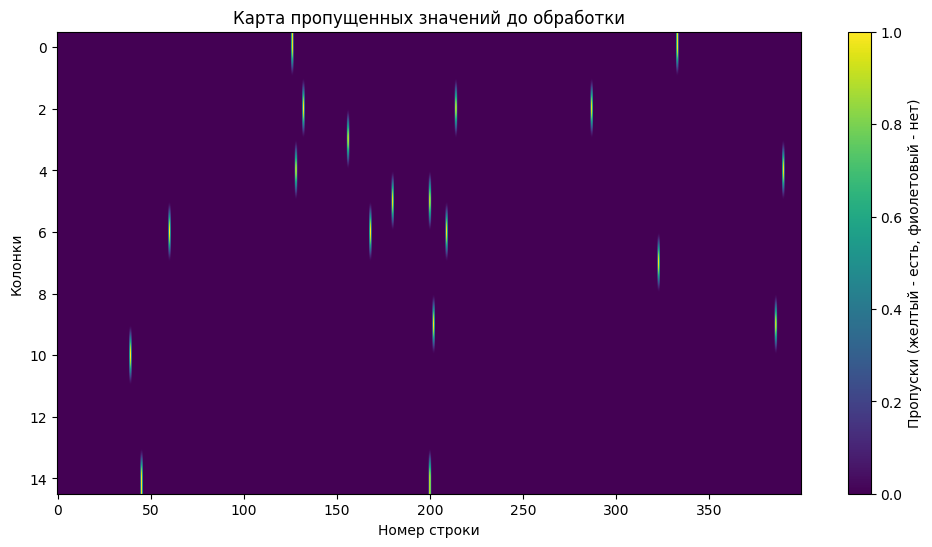

Количество пропусков по колонкам до обработки:
user_id                        2
gender                         3
occupation                     1
work_mode                      2
screen_time_hours              2
work_screen_hours              3
leisure_screen_hours           1
sleep_quality_1_5              2
stress_level_0_10              1
mental_wellness_index_0_100    2
dtype: int64

СТРАТЕГИЯ ОБРАБОТКИ ПРОПУСКОВ:

Колонка 'user_id': 2 пропусков (0.5%)
  -> Заполнено МОДОЙ: 'U0151'

Колонка 'gender': 3 пропусков (0.8%)
  -> Заполнено МОДОЙ: 'Female'

Колонка 'occupation': 1 пропусков (0.2%)
  -> Заполнено МОДОЙ: 'Employed'

Колонка 'work_mode': 2 пропусков (0.5%)
  -> Заполнено МОДОЙ: 'Remote'

Колонка 'screen_time_hours': 2 пропусков (0.5%)
  -> Заполнено МЕДИАНОЙ: 9.09

Колонка 'work_screen_hours': 3 пропусков (0.8%)
  -> Заполнено МЕДИАНОЙ: 1.46

Колонка 'leisure_screen_hours': 1 пропусков (0.2%)
  -> Заполнено МЕДИАНОЙ: 6.70

Колонка 'sleep_quality_1_5': 2 пропусков (0.5%)
  ->

In [5]:
# Проверка и устранение пропусков
print("ПРОВЕРКА И УСТРАНЕНИЕ ПРОПУСКОВ")

# Визуализация пропусков
print("Визуализация пропущенных значений:")
plt.figure(figsize=(12, 6))
plt.imshow(df.isnull().T, cmap='viridis', aspect='auto')
plt.colorbar(label='Пропуски (желтый - есть, фиолетовый - нет)')
plt.title('Карта пропущенных значений до обработки')
plt.xlabel('Номер строки')
plt.ylabel('Колонки')
plt.show()

print("Количество пропусков по колонкам до обработки:")
missing_before = df.isnull().sum()
print(missing_before[missing_before > 0])

print("\nСТРАТЕГИЯ ОБРАБОТКИ ПРОПУСКОВ:")
for col in df.columns:
    missing_count = df[col].isnull().sum()
    if missing_count > 0:
        missing_percent = (missing_count / len(df)) * 100
        col_type = df[col].dtype
        
        print(f"\nКолонка '{col}': {missing_count} пропусков ({missing_percent:.1f}%)")
        
        if missing_percent > 30:
            print("  -> УДАЛЯЕМ КОЛОНКУ (пропусков > 30%)")
            df.drop(columns=[col], inplace=True)
        else:
            if np.issubdtype(col_type, np.number):
                fill_value = df[col].median()
                df[col].fillna(fill_value, inplace=True)
                print(f"  -> Заполнено МЕДИАНОЙ: {fill_value:.2f}")
            else:
                fill_value = df[col].mode()[0] if not df[col].mode().empty else 'Unknown'
                df[col].fillna(fill_value, inplace=True)
                print(f"  -> Заполнено МОДОЙ: '{fill_value}'")

print(f"\nПроверка: осталось пропусков - {df.isnull().sum().sum()}")

СТАТИСТИЧЕСКИЕ ПОКАЗАТЕЛИ И ВЫБРОСЫ
Числовые колонки для анализа: ['age', 'screen_time_hours', 'work_screen_hours', 'leisure_screen_hours', 'sleep_hours', 'sleep_quality_1_5', 'stress_level_0_10', 'productivity_0_100', 'exercise_minutes_per_week', 'social_hours_per_week', 'mental_wellness_index_0_100']

ОСНОВНЫЕ СТАТИСТИЧЕСКИЕ ПОКАЗАТЕЛИ:


,age,screen_time_hours,work_screen_hours,leisure_screen_hours,sleep_hours,sleep_quality_1_5,stress_level_0_10,productivity_0_100,exercise_minutes_per_week,social_hours_per_week,mental_wellness_index_0_100
count,400.00000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,29.77750,9.029475,2.182275,6.836800,7.013175,1.397500,8.147500,54.306500,109.810000,7.905000,20.268250
std,7.46608,2.477145,1.929735,2.218931,0.852421,0.652348,2.093047,15.020054,70.007045,4.909632,20.289216
min,16.00000,1.000000,0.110000,0.890000,4.640000,1.000000,0.000000,20.600000,0.000000,0.000000,0.000000
25%,24.00000,7.395000,0.700000,5.460000,6.397500,1.000000,6.900000,43.600000,58.000000,4.575000,3.775000
50%,30.00000,9.090000,1.460000,6.700000,7.030000,1.000000,8.800000,51.750000,103.000000,7.750000,14.800000
75%,35.00000,10.472500,3.012500,8.372500,7.640000,2.000000,10.000000,63.000000,157.000000,11.025000,30.600000
max,60.00000,19.170000,12.040000,13.350000,9.740000,4.000000,10.000000,100.000000,372.000000,23.900000,97.000000



ВИЗУАЛИЗАЦИЯ ВЫБРОСОВ:


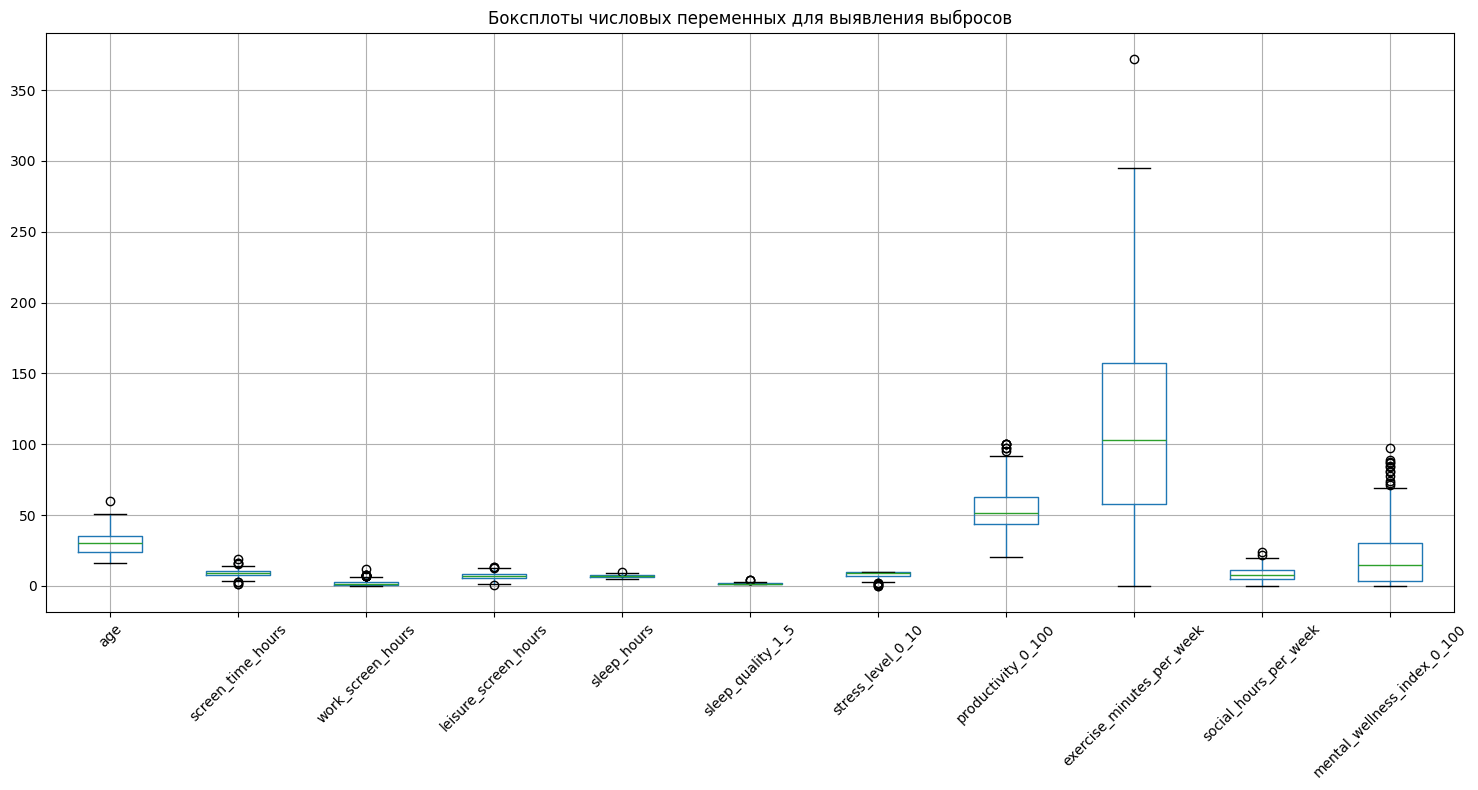

ОБРАБОТКА ВЫБРОСОВ МЕТОДОМ IQR:

age: 1 выбросов
  Границы: [7.50, 51.50]
  Удалено записей: 1

screen_time_hours: 8 выбросов
  Границы: [2.79, 15.05]
  Удалено записей: 8

work_screen_hours: 14 выбросов
  Границы: [-2.73, 6.46]
  Удалено записей: 14

leisure_screen_hours: 1 выбросов
  Границы: [1.07, 12.86]
  Удалено записей: 1

sleep_hours: 1 выбросов
  Границы: [4.50, 9.55]
  Удалено записей: 1

sleep_quality_1_5: 3 выбросов
  Границы: [-0.50, 3.50]
  Удалено записей: 3

stress_level_0_10: 2 выбросов
  Границы: [2.44, 14.54]
  Удалено записей: 2

productivity_0_100: 1 выбросов
  Границы: [16.60, 90.00]
  Удалено записей: 1

exercise_minutes_per_week: 1 выбросов
  Границы: [-93.00, 307.00]
  Удалено записей: 1

social_hours_per_week: 2 выбросов
  Границы: [-4.95, 20.25]
  Удалено записей: 2

mental_wellness_index_0_100: 3 выбросов
  Границы: [-34.46, 69.44]
  Удалено записей: 3
Размер данных после обработки выбросов: (363, 15)


In [6]:
# Статистические показатели и выбросы
print("СТАТИСТИЧЕСКИЕ ПОКАЗАТЕЛИ И ВЫБРОСЫ")

numeric_columns = df.select_dtypes(include=[np.number]).columns
print(f"Числовые колонки для анализа: {list(numeric_columns)}")

# Вычисление статистических показателей
print("\nОСНОВНЫЕ СТАТИСТИЧЕСКИЕ ПОКАЗАТЕЛИ:")
stats_df = df[numeric_columns].describe()
display(stats_df)

# Визуализация выбросов с помощью boxplot
print("\nВИЗУАЛИЗАЦИЯ ВЫБРОСОВ:")
df[numeric_columns].boxplot(figsize=(15, 8), rot=45)
plt.title('Боксплоты числовых переменных для выявления выбросов')
plt.tight_layout()
plt.show()

print("ОБРАБОТКА ВЫБРОСОВ МЕТОДОМ IQR:")
for col in numeric_columns:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    outliers_count = ((df[col] < lower_bound) | (df[col] > upper_bound)).sum()
    
    if outliers_count > 0:
        print(f"\n{col}: {outliers_count} выбросов")
        print(f"  Границы: [{lower_bound:.2f}, {upper_bound:.2f}]")
        
        # Удаляем записи с выбросами (согласно рекомендации презентации)
        before_size = len(df)
        df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
        after_size = len(df)
        print(f"  Удалено записей: {before_size - after_size}")

print(f"Размер данных после обработки выбросов: {df.shape}")

In [7]:
# Поиск ошибок в записях
print("ПОИСК ОШИБОК В ЗАПИСЯХ")

# 1. Поиск полных дубликатов
print("1. ПОИСК ПОЛНЫХ ДУБЛИКАТОВ СТРОК:")
duplicates = df.duplicated()
print(f"Найдено полных дубликатов: {duplicates.sum()}")

if duplicates.sum() > 0:
    df = df.drop_duplicates()
    print("Дубликаты удалены")

# 2. Проверка логических противоречий
print("\n2. ПРОВЕРКА ЛОГИЧЕСКИХ ПРОТИВОРЕЧИЙ:")
if all(col in df.columns for col in ['screen_time_hours', 'work_screen_hours', 'leisure_screen_hours']):
    logic_errors = df['screen_time_hours'] < (df['work_screen_hours'] + df['leisure_screen_hours'])
    print(f"Логические ошибки (экранное время < работы + досуга): {logic_errors.sum()}")

# 3. Проверка аномальных значений
print("\n3. ПРОВЕРКА АНОМАЛЬНЫХ ЗНАЧЕНИЙ:")
if 'age' in df.columns:
    age_errors = (df['age'] < 0) | (df['age'] > 100)
    print(f"Аномальные значения возраста: {age_errors.sum()}")

print("Проверка ошибок завершена")

ПОИСК ОШИБОК В ЗАПИСЯХ
1. ПОИСК ПОЛНЫХ ДУБЛИКАТОВ СТРОК:
Найдено полных дубликатов: 0

2. ПРОВЕРКА ЛОГИЧЕСКИХ ПРОТИВОРЕЧИЙ:
Логические ошибки (экранное время < работы + досуга): 38

3. ПРОВЕРКА АНОМАЛЬНЫХ ЗНАЧЕНИЙ:
Аномальные значения возраста: 0
Проверка ошибок завершена


ПОДГОТОВКА ДАННЫХ ДЛЯ МАШИННОГО ОБУЧЕНИЯ
1. ПРЕОБРАЗОВАНИЕ КАТЕГОРИАЛЬНЫХ ПЕРЕМЕННЫХ В ЧИСЛА:

user_id: 359 уникальных значений
  -> Требует особого подхода

gender: 3 уникальных значений
  -> Label Encoding применен

occupation: 5 уникальных значений
  -> Label Encoding применен

work_mode: 3 уникальных значений
  -> Label Encoding применен

2. УДАЛЕНИЕ НЕНУЖНЫХ ПРИЗНАКОВ:

3. АНАЛИЗ КОРРЕЛЯЦИЙ ДЛЯ УДАЛЕНИЯ МУЛЬТИКОЛЛИНЕАРНЫХ ПРИЗНАКОВ:


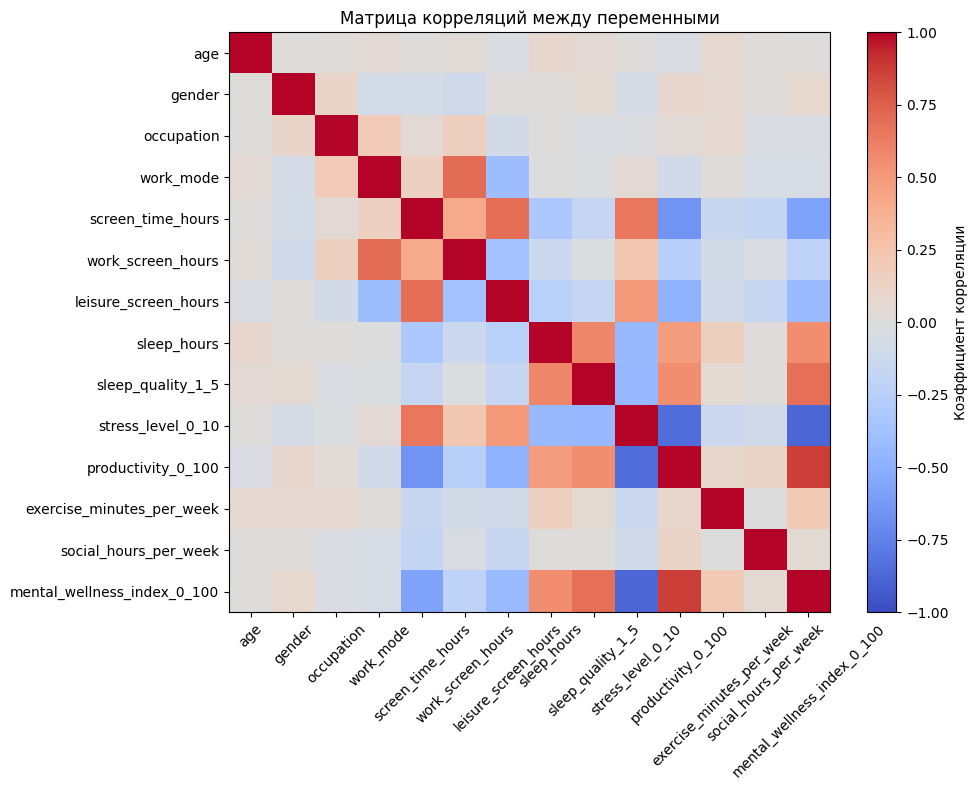

Высококоррелированные пары (|r| > 0.8):
  stress_level_0_10 - productivity_0_100: -0.849
  stress_level_0_10 - mental_wellness_index_0_100: -0.880
  productivity_0_100 - mental_wellness_index_0_100: 0.865
Подготовка данных для МО завершена


In [8]:
# Дополнительные шаги для МО
print("ПОДГОТОВКА ДАННЫХ ДЛЯ МАШИННОГО ОБУЧЕНИЯ")

print("1. ПРЕОБРАЗОВАНИЕ КАТЕГОРИАЛЬНЫХ ПЕРЕМЕННЫХ В ЧИСЛА:")
categorical_cols = df.select_dtypes(include=['object']).columns

for col in categorical_cols:
    unique_count = df[col].nunique()
    print(f"\n{col}: {unique_count} уникальных значений")
    
    if unique_count == 2:
        # Бинарные переменные - используем Label Encoding
        le = LabelEncoder()
        df[col] = le.fit_transform(df[col].astype(str))
        print(f"  -> Label Encoding: {dict(zip(le.classes_, le.transform(le.classes_)))}")
    elif unique_count <= 10:
        # Мало категорий - используем Label Encoding
        le = LabelEncoder()
        df[col] = le.fit_transform(df[col].astype(str))
        print(f"  -> Label Encoding применен")
    else:
        # Много категорий - рассматриваем удаление или особую обработку
        print(f"  -> Требует особого подхода")

print("\n2. УДАЛЕНИЕ НЕНУЖНЫХ ПРИЗНАКОВ:")
# Удаляем колонки, которые не несут полезной информации или дублируют друг друга
cols_to_drop = []
for col in df.columns:
    if df[col].nunique() == 1:  # Все значения одинаковые
        cols_to_drop.append(col)
        print(f"  Удаляем '{col}' - все значения одинаковые")

if cols_to_drop:
    df.drop(columns=cols_to_drop, inplace=True)

print("\n3. АНАЛИЗ КОРРЕЛЯЦИЙ ДЛЯ УДАЛЕНИЯ МУЛЬТИКОЛЛИНЕАРНЫХ ПРИЗНАКОВ:")
numeric_cols = df.select_dtypes(include=[np.number]).columns
if len(numeric_cols) > 1:
    corr_matrix = df[numeric_cols].corr()
    
    # Визуализация корреляционной матрицы
    plt.figure(figsize=(10, 8))
    plt.imshow(corr_matrix, cmap='coolwarm', aspect='auto', vmin=-1, vmax=1)
    plt.colorbar(label='Коэффициент корреляции')
    plt.title('Матрица корреляций между переменными')
    plt.xticks(range(len(corr_matrix.columns)), corr_matrix.columns, rotation=45)
    plt.yticks(range(len(corr_matrix.columns)), corr_matrix.columns)
    plt.tight_layout()
    plt.show()
    
    # Находим высококоррелированные пары
    high_corr_pairs = []
    for i in range(len(corr_matrix.columns)):
        for j in range(i+1, len(corr_matrix.columns)):
            if abs(corr_matrix.iloc[i, j]) > 0.8:
                high_corr_pairs.append((corr_matrix.columns[i], corr_matrix.columns[j], corr_matrix.iloc[i, j]))
    
    if high_corr_pairs:
        print("Высококоррелированные пары (|r| > 0.8):")
        for pair in high_corr_pairs:
            print(f"  {pair[0]} - {pair[1]}: {pair[2]:.3f}")

print("Подготовка данных для МО завершена")

ОБУЧЕНИЕ И ТЕСТИРОВАНИЕ МОДЕЛИ
ПРОВЕРКА И ПОДГОТОВКА ПРИЗНАКОВ ДЛЯ МОДЕЛИ:
Найдены категориальные переменные: ['user_id']

Обработка колонки 'user_id': 359 уникальных значений
  -> УДАЛЯЕМ колонку (слишком много категорий: 359)

Финальные типы данных признаков:
age                              int64
gender                           int32
occupation                       int32
work_mode                        int32
screen_time_hours              float64
work_screen_hours              float64
leisure_screen_hours           float64
sleep_hours                    float64
sleep_quality_1_5              float64
stress_level_0_10              float64
exercise_minutes_per_week        int64
social_hours_per_week          float64
mental_wellness_index_0_100    float64
dtype: object
Пропущенные значения в признаках: 0

Разделение данных: train - 290, test - 73
Количество признаков: 13

ПРОВЕРКА ГОТОВНОСТИ ДАННЫХ:
X_train типы: {dtype('int32'), dtype('float64'), dtype('int64')}
Есть ли NaN в X_tra

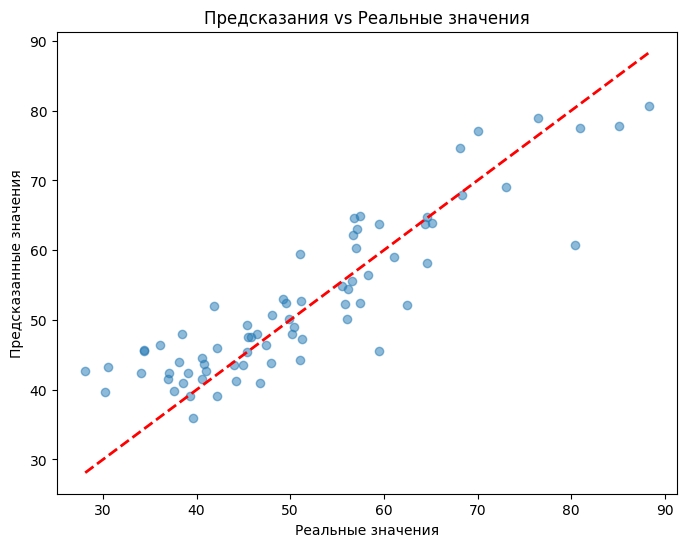


ТОП-10 ВАЖНЕЙШИХ ПРИЗНАКОВ:


,feature,importance
12,mental_wellness_index_0_100,0.627506
9,stress_level_0_10,0.180474
4,screen_time_hours,0.052959
10,exercise_minutes_per_week,0.024666
7,sleep_hours,0.022688
0,age,0.020486
6,leisure_screen_hours,0.020138
5,work_screen_hours,0.017226
11,social_hours_per_week,0.017213
2,occupation,0.006318


Завершение этапа обучения модели


In [10]:
# Обучение и тестирование модели
print("ОБУЧЕНИЕ И ТЕСТИРОВАНИЕ МОДЕЛИ")

# Определяем целевую переменную и признаки
target_column = 'productivity_0_100'

if target_column in df.columns:
    # ПОДГОТОВКА ПРИЗНАКОВ: Убедимся, что все переменные числовые
    print("ПРОВЕРКА И ПОДГОТОВКА ПРИЗНАКОВ ДЛЯ МОДЕЛИ:")
    
    # Создаем копию данных для модели
    X = df.drop(columns=[target_column]).copy()
    y = df[target_column]
    
    # Проверяем и преобразуем все категориальные переменные
    categorical_cols = X.select_dtypes(include=['object']).columns
    print(f"Найдены категориальные переменные: {list(categorical_cols)}")
    
    # Обрабатываем каждую категориальную переменную
    for col in categorical_cols:
        unique_count = X[col].nunique()
        print(f"\nОбработка колонки '{col}': {unique_count} уникальных значений")
        
        if unique_count == 2:
            # Бинарные переменные - Label Encoding
            le = LabelEncoder()
            X[col] = le.fit_transform(X[col].astype(str))
            print(f"  -> Применен Label Encoding: {dict(zip(le.classes_, le.transform(le.classes_)))}")
        elif unique_count <= 20:
            # Мало категорий - Label Encoding
            le = LabelEncoder()
            X[col] = le.fit_transform(X[col].astype(str))
            print(f"  -> Применен Label Encoding ({unique_count} категорий)")
        else:
            # Много категорий - удаляем или используем другие методы
            print(f"  -> УДАЛЯЕМ колонку (слишком много категорий: {unique_count})")
            X.drop(columns=[col], inplace=True)
    
    # Убедимся, что все данные числовые
    print(f"\nФинальные типы данных признаков:")
    print(X.dtypes)
    
    # Проверяем, что нет пропущенных значений
    print(f"Пропущенные значения в признаках: {X.isnull().sum().sum()}")
    
    # Если есть пропуски, заполняем их
    if X.isnull().sum().sum() > 0:
        print("Заполняем оставшиеся пропуски...")
        for col in X.columns:
            if X[col].isnull().sum() > 0:
                if np.issubdtype(X[col].dtype, np.number):
                    X[col].fillna(X[col].median(), inplace=True)
                else:
                    X[col].fillna(X[col].mode()[0], inplace=True)
    
    # Разделение на тренировочную и тестовую выборки
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    print(f"\nРазделение данных: train - {X_train.shape[0]}, test - {X_test.shape[0]}")
    print(f"Количество признаков: {X_train.shape[1]}")
    
    # Проверяем, что данные готовы для обучения
    print("\nПРОВЕРКА ГОТОВНОСТИ ДАННЫХ:")
    print(f"X_train типы: {set(X_train.dtypes)}")
    print(f"Есть ли NaN в X_train: {X_train.isnull().sum().sum()}")
    print(f"Есть ли NaN в y_train: {y_train.isnull().sum()}")
    
    # Обучение модели случайного леса
    print("\nОБУЧЕНИЕ МОДЕЛИ RANDOM FOREST:")
    try:
        model = RandomForestRegressor(n_estimators=100, random_state=42)
        model.fit(X_train, y_train)
        print("Модель успешно обучена!")
        
        # Предсказания и оценка качества
        y_pred = model.predict(X_test)
        
        mse = mean_squared_error(y_test, y_pred)
        r2 = r2_score(y_test, y_pred)
        
        print("\nРЕЗУЛЬТАТЫ МОДЕЛИ:")
        print(f"Среднеквадратичная ошибка (MSE): {mse:.2f}")
        print(f"Коэффициент детерминации (R²): {r2:.2f}")
        
        # Визуализация предсказаний vs реальные значения
        plt.figure(figsize=(8, 6))
        plt.scatter(y_test, y_pred, alpha=0.5)
        plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
        plt.xlabel('Реальные значения')
        plt.ylabel('Предсказанные значения')
        plt.title('Предсказания vs Реальные значения')
        plt.show()
        
        # Важность признаков
        feature_importance = pd.DataFrame({
            'feature': X.columns,
            'importance': model.feature_importances_
        }).sort_values('importance', ascending=False)
        
        print("\nТОП-10 ВАЖНЕЙШИХ ПРИЗНАКОВ:")
        display(feature_importance.head(10))
        
    except Exception as e:
        print(f"ОШИБКА при обучении модели: {e}")
        print("Дополнительная информация для отладки:")
        print(f"Размер X_train: {X_train.shape}")
        print(f"Типы данных в X_train: {X_train.dtypes.unique()}")
        
else:
    print(f"Целевая переменная '{target_column}' не найдена в данных")

print("Завершение этапа обучения модели")

In [11]:
# Финальная проверка и сохранение
print("ФИНАЛЬНАЯ ПРОВЕРКА И СОХРАНЕНИЕ")

print("ИТОГОВАЯ ИНФОРМАЦИЯ О ДАННЫХ:")
print(f"Размер данных: {df.shape}")
print(f"Типы данных:\n{df.dtypes}")
print(f"Пропущенные значения: {df.isnull().sum().sum()}")

# Сохраняем обработанные данные
df.to_csv('processed_DB_3.csv', index=False)
print("\nОбработанные данные сохранены в 'processed_DB_3.csv'")

print("\n=== ОБРАБОТКА ДАННЫХ ПО АЛГОРИТМУ ИЗ ПРЕЗЕНТАЦИИ ЗАВЕРШЕНА ===")
print("Все этапы выполнены последовательно:")
print("1. ✓ Понимание данных")
print("2. ✓ Обработка названий колонок")
print("3. ✓ Обработка пропусков")
print("4. ✓ Статистический анализ и выбросы")
print("5. ✓ Поиск ошибок в записях")
print("6. ✓ Подготовка для машинного обучения")
print("7. ✓ Обучение и тестирование модели")

ФИНАЛЬНАЯ ПРОВЕРКА И СОХРАНЕНИЕ
ИТОГОВАЯ ИНФОРМАЦИЯ О ДАННЫХ:
Размер данных: (363, 15)
Типы данных:
user_id                         object
age                              int64
gender                           int32
occupation                       int32
work_mode                        int32
screen_time_hours              float64
work_screen_hours              float64
leisure_screen_hours           float64
sleep_hours                    float64
sleep_quality_1_5              float64
stress_level_0_10              float64
productivity_0_100             float64
exercise_minutes_per_week        int64
social_hours_per_week          float64
mental_wellness_index_0_100    float64
dtype: object
Пропущенные значения: 0

Обработанные данные сохранены в 'processed_DB_3.csv'

=== ОБРАБОТКА ДАННЫХ ПО АЛГОРИТМУ ИЗ ПРЕЗЕНТАЦИИ ЗАВЕРШЕНА ===
Все этапы выполнены последовательно:
1. ✓ Понимание данных
2. ✓ Обработка названий колонок
3. ✓ Обработка пропусков
4. ✓ Статистический анализ и выбросы
5. ✓ П